# 多项式函数拟合实验

In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append("..")
import library.d2lzh_pytorch as d2l

#### y = 1.2 * x  - 3.4 * (x ** 2) +  5.6 * (x ** 3) + 5 + e
##### 其中噪声e服从(0, 0.01)正态分布

In [7]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] *  poly_features[:, 1]  + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float) # 加噪声

In [8]:
features[:2], poly_features[:2], labels[:2]

(tensor([[-0.7327],
         [ 1.2455]]),
 tensor([[-0.7327,  0.5369, -0.3934],
         [ 1.2455,  1.5513,  1.9322]]),
 tensor([ 0.0935, 12.0439]))

# 定义作图函数

In [9]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)  
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:  
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')  
        d2l.plt.legend(legend)

# 定义、训练和测试模型

In [33]:
num_epochs, loss = 1000, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss',  test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',  range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data, '\nbias:', net.bias.data)

# 三阶多项式函数拟合(正常)

final epoch: train loss 9.86929953796789e-05 test loss 0.00013048200344201177
weight: tensor([[ 1.1973, -3.3986,  5.6011]]) 
bias: tensor([4.9994])


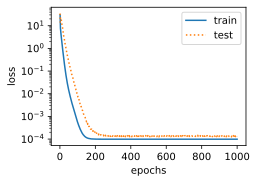

In [34]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:])

# 欠拟合

final epoch: train loss 77.70061492919922 test loss 249.44357299804688
weight: tensor([[13.2123]]) 
bias: tensor([1.2903])


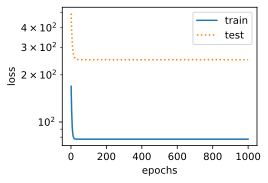

In [35]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

# 过拟合

final epoch: train loss 2.0935059241722342e-11 test loss 85.80597686767578
weight: tensor([[1.6679, 2.1639, 2.7760]]) 
bias: tensor([1.2460])


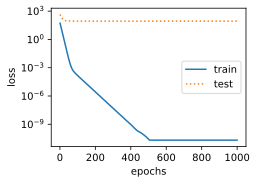

In [36]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2], labels[n_train:])